In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from tqdm import tqdm

In [72]:
df = pd.read_csv("train.csv")

print("Number of data points:",df.shape[0])

Number of data points: 5279


In [3]:
df.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


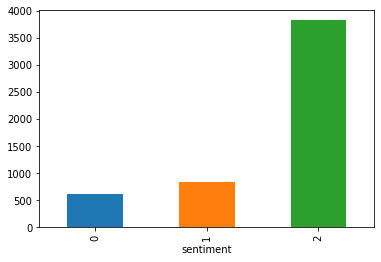

In [4]:
df.groupby("sentiment")['unique_hash'].count().plot.bar()

In [5]:
qids = pd.Series(df['drug'].tolist())
unique_qs = len(np.unique(qids))

In [6]:
qids.values

array(['gilenya', 'gilenya', 'fingolimod', ..., 'opdivo', 'lucentis',
       'ocrevus'], dtype=object)

In [7]:
unique_qs

102

Maximum number of times a single Drug is repeated: 676



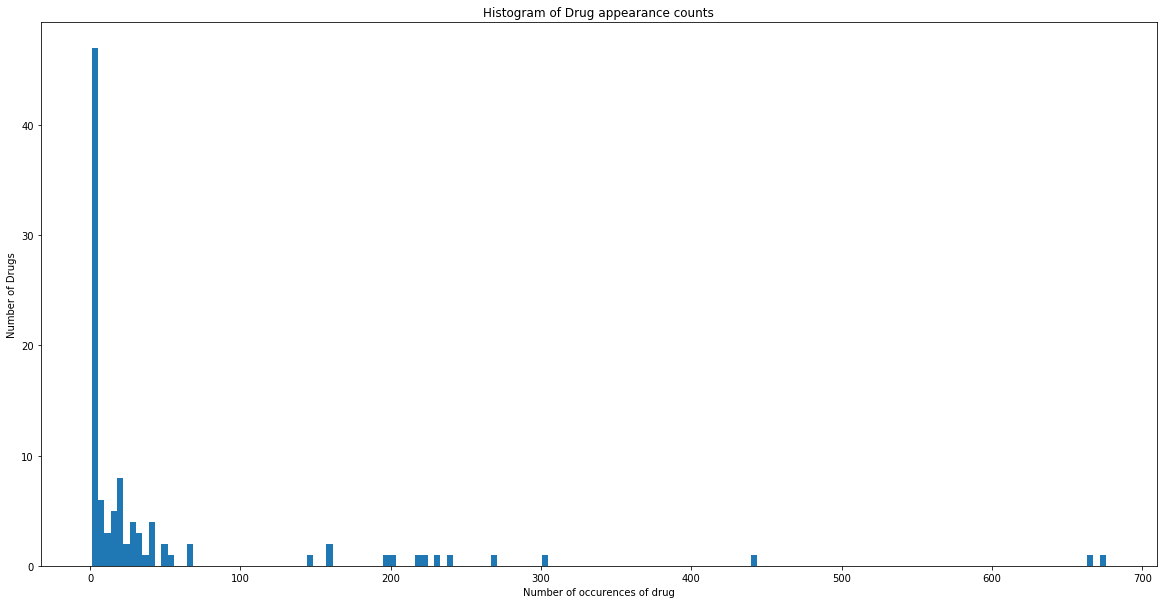

In [8]:
plt.figure(figsize=(20, 10))

plt.hist(qids.value_counts(), bins=160)

plt.title('Histogram of Drug appearance counts')

plt.xlabel('Number of occurences of drug')

plt.ylabel('Number of Drugs')

print ('Maximum number of times a single Drug is repeated: {}\n'.format(max(qids.value_counts()))) 

In [9]:
np.sort(qids.value_counts())

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   2,   2,   2,   2,   2,
         2,   2,   2,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
         4,   4,   4,   4,   4,   5,   5,   5,   6,   6,   7,   7,   7,
         9,  10,  11,  12,  14,  14,  14,  14,  15,  18,  18,  19,  19,
        20,  20,  20,  22,  23,  24,  27,  28,  29,  29,  33,  33,  34,
        35,  39,  41,  43,  43,  48,  50,  52,  65,  67, 146, 161, 161,
       199, 200, 218, 224, 229, 238, 270, 303, 441, 666, 676])

In [10]:
#Checking whether there are any rows with null values
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [unique_hash, text, drug, sentiment]
Index: []


In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sourabhsingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [73]:
STOP_WORDS = stopwords.words("english")
def preprocess(x):
    x = str(x).lower()
    x = re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE)
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will").replace('[^\w\s]','').replace("s", "is")\
                           .replace("'ll", "will")
    x = re.sub(r"[0-9]", "digit", x)   
    x = re.sub(r"\"", "", x)    
    x = re.sub(r'[?|!|\'|"|#]',r'',x)
    x = re.sub(r'[.|,|)|(|\|/]',r' ',x)
    x = x.strip()
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x

In [74]:
df["text"] = df["text"].apply(preprocess)

In [75]:
df['words_not_stopword'] = df['text'].apply(lambda x: len([t for t in x.split(' ') if t not in STOP_WORDS]))

df["text"] = df["text"].apply(lambda x: " ".join(x for x in x.split() if x not in STOP_WORDS))
df['length'] = df['text'].apply(lambda x: len(x))
    #get number of words
df['words'] = df['text'].apply(lambda x: len(x.split(' ')))

#get the average word length
df['avg_word_length'] = df['text'].apply(lambda x: np.mean([len(t) for t in x.split(' ') ]) if len([len(t) for t in x.split(' ')]) > 0 else 0)

In [76]:
df.head()

,unique_hash,text,drug,sentiment,words_not_stopword,length,words,avg_word_length
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,autoimmune diiseaiseis tend come cluisteris ai...,gilenya,2,55,260,39,5.692308
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,completely underistand youd want try reisultis...,gilenya,2,128,786,108,6.287037
2,fe809672251f6bd0d986e00380f48d047c7e7b76,intereisting targetis isdigitp digit digit rec...,fingolimod,2,137,758,103,6.368932
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,intereisting grand merci wonder lemtrada ocrev...,ocrevus,2,16,97,13,6.538462
4,b227688381f9b25e5b65109dd00f7f895e838249,hi everybody lateist mri reisultis brain cervi...,gilenya,1,80,470,66,6.136364


In [65]:
X = df.fillna(' ')
X.drop(df.index[0], inplace=True)

In [66]:
Y = X['sentiment']
X.drop(['unique_hash','sentiment'], axis=1, inplace=True)

In [21]:
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression



from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [67]:
model = Pipeline([('vectorizer', CountVectorizer()),
 ('tfidf', TfidfTransformer(use_idf=False)),
 ('clf', OneVsRestClassifier(LinearSVC(class_weight="balanced")))])

In [77]:
from sklearn.model_selection import GridSearchCV

parameters = { 'vectorizer__ngram_range': [(1, 1), (1, 2),(2,2)],
               'tfidf__use_idf': (True, False),
            }

gs_clf_svm = GridSearchCV(model, parameters,scoring="f1_macro", n_jobs=-1,verbose=2)
gs_clf_svm = gs_clf_svm.fit(X['text'], Y)
print(gs_clf_svm.best_score_)
print(gs_clf_svm.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   49.4s finished


0.4871530357109651
{'tfidf__use_idf': False, 'vectorizer__ngram_range': (1, 2)}


In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y,random_state=42)
print('Train Data shape:',X_train.shape)
print('Test Data shape:',X_test.shape)

Train Data shape: (4222, 6)
Test Data shape: (1056, 6)


In [93]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on text columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    


In [103]:
text = Pipeline([
                ('selector', TextSelector(key='text')),
                ('vectorizer', CountVectorizer(ngram_range=(1,2))),
                ('tfidf', TfidfTransformer(use_idf=False)),
            ])

In [98]:
drug = Pipeline([
                ('selector', TextSelector(key='drug')),
                ('tfidfdrug', TfidfVectorizer())
            ])

In [97]:
from sklearn.preprocessing import StandardScaler
length =  Pipeline([
                ('selector', NumberSelector(key='length')),
                ('standard', StandardScaler())
            ])
words =  Pipeline([
                ('selector', NumberSelector(key='words')),
                ('standard', StandardScaler())
            ])
words_not_stopword =  Pipeline([
                ('selector', NumberSelector(key='words_not_stopword')),
                ('standard', StandardScaler())
            ])
avg_word_length =  Pipeline([
                ('selector', NumberSelector(key='avg_word_length')),
                ('standard', StandardScaler())
            ])

In [104]:
from sklearn.pipeline import FeatureUnion

feats = FeatureUnion([('text', text), 
                      ('drug', drug),
                      ('length', length),
                      ('words', words),
                      ('words_not_stopword', words_not_stopword),
                      ('avg_word_length', avg_word_length),])

feature_processing = Pipeline([('feats', feats)])
feature_processing.fit_transform(X_train)

<4222x485328 sparse matrix of type '<class 'numpy.float64'>'
	with 1315309 stored elements in Compressed Sparse Row format>

In [171]:
from sklearn.linear_model import LogisticRegression
pipeline1 = Pipeline([
    ('features',feats),
    ('clf', OneVsRestClassifier(LogisticRegression(class_weight="balanced",C=1))),
])

pipeline.fit(X_train, y_train)

pred = pipeline.predict(X_test)
print(f1_score(pred, y_test,average="macro"))

0.4055411067359895


In [163]:
from sklearn.svm import SVC, LinearSVC, NuSVC
pipeline = Pipeline([
    ('features',feats),
    ('clf', OneVsRestClassifier(LinearSVC(class_weight="balanced"))),
])

pipeline.fit(X_train, y_train)

pred = pipeline.predict(X_test)
print(f1_score(pred, y_test,average="macro"))

0.5113569672241888


In [174]:
from sklearn.linear_model import SGDClassifier
pipeline1 = Pipeline([
    ('features',feats),
    ('clf', OneVsRestClassifier(SGDClassifier(loss='log', class_weight='balanced'))),
])

pipeline.fit(X_train, y_train)

pred = pipeline.predict(X_test)
print(f1_score(pred, y_test,average="macro"))

0.4037266517027454


In [124]:
pipeline.fit(X, Y)

Pipeline(memory=None,
         steps=[('features',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('text',
                                                 Pipeline(memory=None,
                                                          steps=[('selector',
                                                                  TextSelector(key='text')),
                                                                 ('vectorizer',
                                                                  CountVectorizer(analyzer='word',
                                                                                  binary=False,
                                                                                  decode_error='strict',
                                                                                  dtype=<class 'numpy.int64'>,
                                                                                  encoding='utf-8',
                

In [125]:
test = pd.read_csv("test.csv")

test["text"] = test["text"].apply(preprocess)
test['words_not_stopword'] = test['text'].apply(lambda x: len([t for t in x.split(' ') if t not in STOP_WORDS]))

test["text"] = test["text"].apply(lambda x: " ".join(x for x in x.split() if x not in STOP_WORDS))
test['length'] = test['text'].apply(lambda x: len(x))
    #get number of words
test['words'] = test['text'].apply(lambda x: len(x.split(' ')))

#get the average word length
test['avg_word_length'] = test['text'].apply(lambda x: np.mean([len(t) for t in x.split(' ') ]) if len([len(t) for t in x.split(' ')]) > 0 else 0)

In [146]:
testX = test.fillna(' ')

In [147]:
testX.drop(['unique_hash'], axis=1, inplace=True)

In [148]:
test.shape

(2924, 7)

In [149]:
submission = pipeline.predict(testX)

In [150]:
submission.shape

(2924,)

In [151]:
submissions = pd.DataFrame({'unique_hash':test['unique_hash'],'sentiment':submission})

#Visualize the first 5 rows
submissions.head()

,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,1
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,1
2,50b6d851bcff4f35afe354937949e9948975adf7,2
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,2


In [153]:
filename = 'linearsvm_submission.csv'

submissions.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: linearsvm_submission.csv
